###### 161227-2330-06@kaben: notes below follow along with *[Python for Finance: Analyze Big Financial Data](https://www.amazon.com/Python-Finance-Analyze-Financial-Data/dp/1491945281)*.

*The Zen of Python:*

In [1]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


In [2]:
import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')

In [3]:
import numpy as np
import pandas as pd
from pandas_datareader import data, wb

In [4]:
%timeit data.DataReader('GOOG', data_source='google', start='3/14/2009', end='4/14/2014')

The slowest run took 5.55 times longer than the fastest. This could mean that an intermediate result is being cached.
1 loop, best of 3: 446 ms per loop


###### 161228-2003-06@kaben: below is alternate syntax using datetime.datetime(...).
###### 161228-2012-06@kaben: Idiom demonstrated: dowloading daily price data.

In [5]:
import datetime
goog = data.DataReader('GOOG', data_source='google', start=datetime.datetime(2009,3,14), end=datetime.datetime(2016,12,28))
goog.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2016-12-20,796.76,798.65,793.27,796.42,951014.0
2016-12-21,795.84,796.68,787.10,794.56,1211346.0
2016-12-22,792.36,793.32,788.58,791.26,972169.0
2016-12-23,790.90,792.74,787.28,789.91,623944.0
2016-12-27,790.68,797.86,787.66,791.55,789321.0


###### 161228-1956-06@kaben: Pandas warns that `rolling_std`  is deprecated. Below are both the deprecated and current idioms.
###### 161228-2011-06@kaben: Idioms demonstrated:
* Computing log of return.
* Computing volatility.

In [6]:
%timeit goog['Log_Ret'] = np.log(goog['Close']/goog['Close'].shift(1))

The slowest run took 88.65 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 3: 409 µs per loop


In [7]:
%timeit goog['Volatility'] = pd.rolling_std(goog['Log_Ret'], window=252)*np.sqrt(252)

/Users/kaben/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:257: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=252,center=False).std()


The slowest run took 4.58 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 3: 550 µs per loop


In [8]:
%timeit goog['Volatility'] = goog['Log_Ret'].rolling(window=252).std()*np.sqrt(252)

1000 loops, best of 3: 525 µs per loop


array([<matplotlib.axes._subplots.AxesSubplot object at 0x112e75908>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x112e3a5f8>], dtype=object)

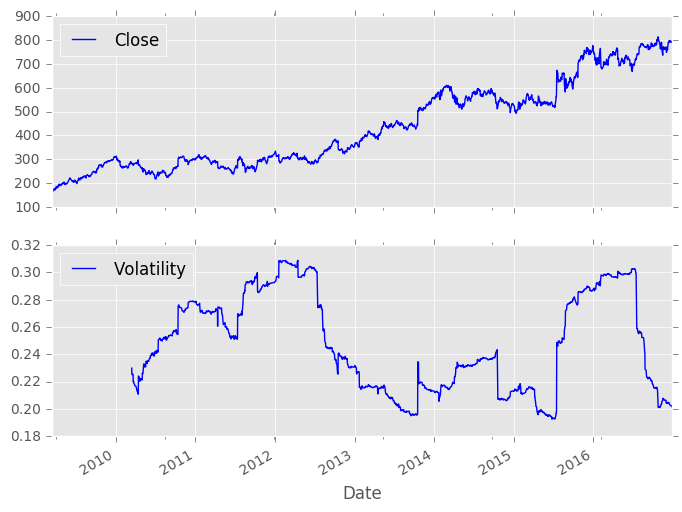

In [9]:
goog[['Close', 'Volatility']].plot(subplots=True, color='blue', figsize=(8,6))